In [1]:
import sys
sys.path.append('/Users/hnamkung/workspace/sketch_home')
from python_lib.pkl_saver import PklSaver

import os
before_path = '/Users/hnamkung/workspace/sketch_home/sketch_control_plane/SketchMD/result/workload_3/before'
after_path = '/Users/hnamkung/workspace/sketch_home/sketch_control_plane/SketchMD/result/workload_3/after'
pcap_dir_list = sorted(os.listdir(before_path))

import statistics


In [2]:
# HLL
before_list = []
after_list = []

for pcap_dir in pcap_dir_list:
    # print(pcap_dir)
    for inst_name in ["inst2", "inst8"]:
        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
        saver = PklSaver(before_pkl_path, "data.pkl")
        before_list += saver.load()

        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
        saver = PklSaver(after_pkl_path, "data.pkl")
        after_list += saver.load()

print(before_list)
print(after_list)

print(len(before_list), statistics.median(before_list))
print(len(after_list), statistics.median(after_list))


[1.0935183628555272, 3.873305163841233, 2.0780119395514203, 0.9256144093874369, 0.7309460504904097, 0.07550969041026932, 1.2938026087206904, 0.6003630573894349, 1.6084037025618658, 0.007038845629316792, 0.019820586983013023, 0.33920533661474694, 1.686056314280897, 1.230860765848262, 0.0788340444821096, 0.526336855587576, 0.13022422984576568, 0.7567587000287603, 0.2129185364807819, 1.8833112592921506, 0.5193001025369629, 0.7029827492350722, 0.34662045060658575, 1.614663783338482, 1.0953130101813648, 1.7018968196320372, 1.8121816486118085, 1.7416951753684815, 0.2019453777436793, 0.8281868116230754, 0.8193492476167966, 1.2046952224052718, 0.7299959095056795, 0.1497613741959348, 2.325260364740709, 1.178342405789142, 0.6349350531383414, 1.096283514484259, 0.5209632543413605, 0.4268826619964973, 0.9625986945358841, 4.68231920422977, 1.2863614241323797, 0.5945487539097052, 0.30897173053044963, 1.034785987443506, 0.3636436896235633, 0.3946592310579655, 0.8807119087929409, 1.772664933576239, 1.

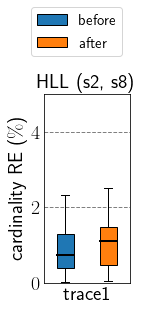

In [3]:
import matplotlib.pyplot as plt
import math
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

data = [before_list, after_list]

values = []

position = 0
positions = []
labels = []
colors = []

for i, v in enumerate(data):
    labels.append("%d.txt" % (i+1))
    values.append(v)
    colors.append('C'+str(int(i)))
    positions.append(position)
    position += 1


plt.figure(figsize=(2, 5))

box_plot_data = values
box = plt.boxplot(box_plot_data, patch_artist=True, labels=labels, widths=0.4, positions=positions, showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set(color='black', linewidth=2)

plt.tick_params(labelsize=20)

# plt.axis('off')

ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

plt.title("HLL (s2, s8)", fontsize = 20)
plt.ylabel("cardinality RE ($\%$)", fontsize = 20)
plt.ylim([0, 5])
# from matplotlib.ticker import MultipleLocator
# ax.yaxis.set_major_locator(MultipleLocator(0.5))
plt.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc=1, bbox_to_anchor=(1,1.5), fontsize=15)
plt.xticks([0.5], ["trace1"])


plt.grid(color='gray', linestyle='--', linewidth=1)
ax.xaxis.grid(False)
plt.tight_layout()
plt.savefig("hll.png", bbox_inches='tight', pad_inches=0.2)
plt.show()
plt.close()


In [4]:
# PCSA
before_list = []
after_list = []

for pcap_dir in pcap_dir_list:
    # print(pcap_dir)
    for inst_name in ["inst9"]:
        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
        saver = PklSaver(before_pkl_path, "data.pkl")
        before_list += saver.load()

        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
        saver = PklSaver(after_pkl_path, "data.pkl")
        after_list += saver.load()

print(before_list)
print(after_list)

print(len(before_list), statistics.median(before_list))
print(len(after_list), statistics.median(after_list))


[2.1379063951411217, 0.14301755875731148, 0.595848477309823, 1.1512339010436725, 0.03231125768785097, 0.04961958319550116, 1.9651344168408726, 0.4194581373269467, 1.0121802679658953, 0.5997036000625937, 1.1047245198373756, 0.04724487766063258, 0.13899077255704412, 0.8810147290212273, 0.4271062050711342, 0.8568971622236835, 0.11905997569955369, 2.3919905621273476, 1.241992352386155, 1.390794377940423, 1.5819542023588664, 0.10539548007092236, 2.1469650182929536, 0.6270313267088001, 1.2293060754092062, 0.17982751238607866, 1.6310010703223017]
[1.3551980831652348, 2.4368322977644894, 0.8317306491495366, 0.31939345094176297, 3.052340049301176, 1.420695911027641, 1.108186933508784, 2.739426675930699, 1.1279071193006978, 1.2537106669305365, 2.644295616885021, 1.5277960104770298, 1.098462049355555, 2.7568906782285536, 2.0099195660654248, 0.8530226130528368, 2.648065311777739, 2.3515324769767982, 0.7009050060122777, 2.4902389359039026, 0.5444972567577853, 0.5764758982797136, 2.6057341992713448,

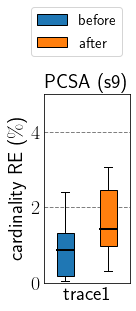

In [5]:
import matplotlib.pyplot as plt
import math
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

data = [before_list, after_list]

values = []

position = 0
positions = []
labels = []
colors = []

for i, v in enumerate(data):
    labels.append("%d.txt" % (i+1))
    values.append(v)
    colors.append('C'+str(int(i)))
    positions.append(position)
    position += 1


plt.figure(figsize=(2, 5))

box_plot_data = values
box = plt.boxplot(box_plot_data, patch_artist=True, labels=labels, widths=0.4, positions=positions, showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set(color='black', linewidth=2)

plt.tick_params(labelsize=20)

# plt.axis('off')

ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

plt.title("PCSA (s9)", fontsize = 20)
plt.ylabel("cardinality RE ($\%$)", fontsize = 20)
plt.ylim([0, 5])
# from matplotlib.ticker import MultipleLocator
# ax.yaxis.set_major_locator(MultipleLocator(0.5))
plt.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc=1, bbox_to_anchor=(1,1.5), fontsize=15)
plt.xticks([0.5], ["trace1"])


plt.grid(color='gray', linestyle='--', linewidth=1)
ax.xaxis.grid(False)
plt.tight_layout()
plt.savefig("pcsa.png", bbox_inches='tight', pad_inches=0.2)
plt.show()
plt.close()


In [6]:
# Entropy
before_list = []
after_list = []

for pcap_dir in pcap_dir_list:
    for inst_name in ["inst5", "inst10"]:
        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
        saver = PklSaver(before_pkl_path, "data.pkl")
        before_list += saver.load()

        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
        saver = PklSaver(after_pkl_path, "data.pkl")
        after_list += saver.load()

print(before_list)
print(after_list)

print(len(before_list), statistics.median(before_list))
print(len(after_list), statistics.median(after_list))


[18.26816289524277, 20.0348135628933, 22.800837851750284, 25.482742962488153, 18.27288186678612, 19.998316801061133, 22.904494583871344, 25.59086612009195, 18.52028613587584, 20.1177675955552, 23.058827040886804, 25.581912185169582, 18.092337045524413, 20.30118950743039, 22.721778894963503, 25.724076294184723, 18.340499260111066, 20.21565032101259, 22.87577042710803, 25.69042759769658, 19.140940067168223, 21.07702559100516, 23.777407862508888, 26.637033451455565, 20.822996132488296, 18.760333442182755, 25.30949239625085, 24.763430839554896, 15.305072951612022, 17.21546834819464, 21.270275049408045, 23.219273985556587, 14.832403738670887, 16.9455104157862, 20.441692616369632, 23.654563413096156]
[19.089286622811127, 20.49718676036708, 23.981362977737792, 26.334117841534717, 18.95900345083774, 20.351732573105018, 23.90627182626336, 26.323647646213832, 19.265931921720327, 20.43906920857118, 24.180437246868724, 26.079057239664593, 18.890537554685384, 20.405472382045406, 23.881220624648396,

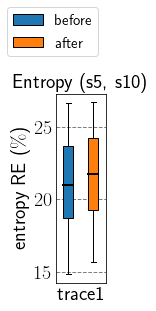

In [7]:
import matplotlib.pyplot as plt
import math
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

data = [before_list, after_list]

values = []

position = 0
positions = []
labels = []
colors = []

for i, v in enumerate(data):
    labels.append("%d.txt" % (i+1))
    values.append(v)
    colors.append('C'+str(int(i)))
    positions.append(position)
    position += 1


plt.figure(figsize=(2, 5))

box_plot_data = values
box = plt.boxplot(box_plot_data, patch_artist=True, labels=labels, widths=0.4, positions=positions, showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set(color='black', linewidth=2)

plt.tick_params(labelsize=20)

# plt.axis('off')

ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

plt.title("Entropy (s5, s10)", fontsize = 20)
plt.ylabel("entropy RE ($\%$)", fontsize = 20)
# plt.ylim([0, 5])
# from matplotlib.ticker import MultipleLocator
# ax.yaxis.set_major_locator(MultipleLocator(0.5))
plt.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc=1, bbox_to_anchor=(1,1.5), fontsize=15)
plt.xticks([0.5], ["trace1"])


plt.grid(color='gray', linestyle='--', linewidth=1)
ax.xaxis.grid(False)
plt.tight_layout()
plt.savefig("entropy.png", bbox_inches='tight', pad_inches=0.2)
plt.show()
plt.close()


In [8]:
# MRAC
before_list = []
after_list = []

for pcap_dir in pcap_dir_list:
    for inst_name in ["inst6"]:
        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
        saver = PklSaver(before_pkl_path, "data.pkl")
        before_list += saver.load()

        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
        saver = PklSaver(after_pkl_path, "data.pkl")
        after_list += saver.load()

print(before_list)
print(after_list)
print(len(before_list), statistics.median(before_list))
print(len(after_list), statistics.median(after_list))


[0.3716942331827189, 0.5104802655512953, 0.46351201955967153, 0.4688222534427769, 0.4669974296649443, 0.4735678690408173, 0.37613897439080435, 0.516077256848136, 0.4788846486172373, 0.4487382365590884, 0.4377379664266687, 0.452225454785679, 0.4798135742656438, 0.4948908312497955, 0.445720240952445, 0.46257258758303305, 0.43171451617384055, 0.44284543147891386, 0.559724166015343, 0.5074820738645512, 0.4789740756403051, 0.4675116023085109, 0.4555535557804682, 0.4442849581877547, 0.39452202004801706, 0.4884844946521367, 0.4764011508278476, 0.5061869284884353, 0.4606186685879731, 0.48397714342395437, 0.5531462696728543, 0.5067160338633854, 0.4655511863102711, 0.47284507793807334, 0.37613381466641815, 0.47995869538262725, 0.4882941451595248, 0.505127281799051, 0.4279785156830024, 0.44446560503909416, 0.46166373275801964, 0.4376779820283013, 0.5099531319458209, 0.4526336823527965, 0.45726038776718975, 0.426119197240543, 0.46594050843315565, 0.4215570220862496, 0.5122154140538744, 0.482890782

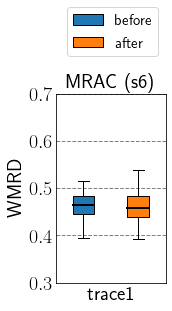

In [9]:
import matplotlib.pyplot as plt
import math
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

data = [before_list, after_list]

values = []

position = 0
positions = []
labels = []
colors = []

for i, v in enumerate(data):
    labels.append("%d.txt" % (i+1))
    values.append(v)
    colors.append('C'+str(int(i)))
    positions.append(position)
    position += 1


plt.figure(figsize=(2.5, 5))

box_plot_data = values
box = plt.boxplot(box_plot_data, patch_artist=True, labels=labels, widths=0.4, positions=positions, showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set(color='black', linewidth=2)

plt.tick_params(labelsize=20)

# plt.axis('off')

ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

plt.title("MRAC (s6)", fontsize = 20)
plt.ylabel("WMRD", fontsize = 20)
plt.ylim([0.3, 0.7])
# from matplotlib.ticker import MultipleLocator
# ax.yaxis.set_major_locator(MultipleLocator(0.5))
plt.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc=1, bbox_to_anchor=(1,1.5), fontsize=15)
plt.xticks([0.5], ["trace1"])


plt.grid(color='gray', linestyle='--', linewidth=1)
ax.xaxis.grid(False)
plt.tight_layout()
plt.savefig("mrac.png", bbox_inches='tight', pad_inches=0.2)
plt.show()
plt.close()


In [10]:
# UnivMon
before_list = []
after_list = []

for pcap_dir in pcap_dir_list:
    for inst_name in ["inst3", "inst7"]:
        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
        saver = PklSaver(before_pkl_path, "data.pkl")
        before_list += saver.load()

        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
        saver = PklSaver(after_pkl_path, "data.pkl")
        after_list += saver.load()

print(before_list)
print(after_list)

print(len(before_list), statistics.median(before_list))
print(len(after_list), statistics.median(after_list))


[9.051453384500375, 7.14824959454153, 14.102248567778094, 3.972201706464141, 13.519383455005428, 1.4387562483822445, 11.333874145578864, 0.31101425477454053, 12.933685330105046, 0.5655903253177584, 6.949239149044355, 9.805241348756564, 3.4812407505550853, 1.3135839943796261, 6.826411928721249, 0.12232045803521568, 5.298778950489002, 8.231591007357201]
[6.954640264898327, 7.426224026165769, 12.89036559512391, 0.8437085352621255, 11.471896972505055, 0.26292127701100587, 11.204065336003984, 0.46843924431366496, 12.876473592651138, 3.2982842190094535, 7.1868879903576985, 11.815309020734073, 3.1010195542078836, 0.7295364544118669, 5.852059362534866, 0.7019206058526986, 6.381296747709881, 5.982299845839697]
18 6.887825538882802
18 6.181798296774789


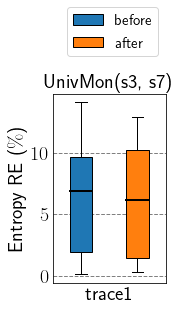

In [11]:
import matplotlib.pyplot as plt
import math
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

data = [before_list, after_list]

values = []

position = 0
positions = []
labels = []
colors = []

for i, v in enumerate(data):
    labels.append("%d.txt" % (i+1))
    values.append(v)
    colors.append('C'+str(int(i)))
    positions.append(position)
    position += 1


plt.figure(figsize=(2.5, 5))

box_plot_data = values
box = plt.boxplot(box_plot_data, patch_artist=True, labels=labels, widths=0.4, positions=positions, showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set(color='black', linewidth=2)

plt.tick_params(labelsize=20)

# plt.axis('off')

ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

# plt.title("CM(inst6) CS(inst7), Kary(inst8)", fontsize = 20)
plt.title("UnivMon(s3, s7)", fontsize = 20)
plt.ylabel("Entropy RE ($\%$)", fontsize = 20)
# plt.ylim([0, 6])
# from matplotlib.ticker import MultipleLocator
# ax.yaxis.set_major_locator(MultipleLocator(2))
plt.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc=1, bbox_to_anchor=(1,1.5), fontsize=15)
plt.xticks([0.5], ["trace1"])


plt.grid(color='gray', linestyle='--', linewidth=1)
ax.xaxis.grid(False)
plt.tight_layout()
plt.savefig("UnivMon.png", bbox_inches='tight', pad_inches=0.2)
plt.show()
plt.close()


In [18]:
before_list = []
after_list = []

for pcap_dir in pcap_dir_list:
    for inst_name in ["inst3", "inst7"]:
        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
        saver = PklSaver(before_pkl_path, "hf.pkl")
        before_list += saver.load()

        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
        saver = PklSaver(after_pkl_path, "hf.pkl")
        after_list += saver.load()

print(before_list)
print(after_list)



[(50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (49, 1), (50, 0), (49, 1), (50, 0), (50, 0), (50, 0), (48, 2), (50, 0), (50, 0)]
[(50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0)]
